<a href="https://colab.research.google.com/github/sanju4n3ro/evaluacion3y4/blob/main/evaluacion3y4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to r

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - accuracy: 0.2315 - loss: 2.5646 - val_accuracy: 0.3333 - val_loss: 0.6833
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8843 - loss: 0.3617 - val_accuracy: 0.3333 - val_loss: 0.6974
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8843 - loss: 1.8993 - val_accuracy: 0.3333 - val_loss: 0.7058
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8843 - loss: 0.4313 - val_accuracy: 0.3333 - val_loss: 0.7456
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0733 - val_accuracy: 0.3333 - val_loss: 0.7820
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7685 - loss: 1.6529 - val_accuracy: 0.3333 - val_loss: 0.7692
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 4.5790e-05 - val_accuracy: 0.3333 - val_loss: 0.7403
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.3333 - val_loss: 0.

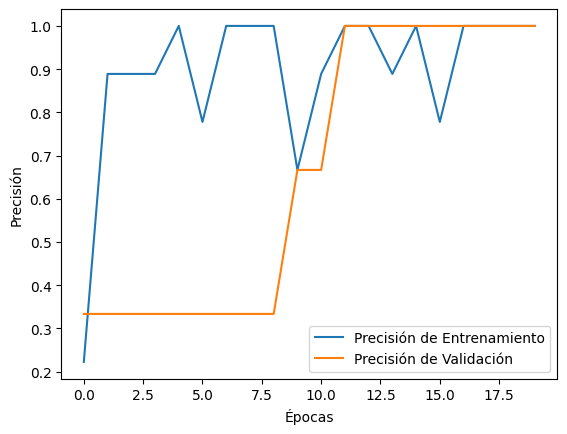

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


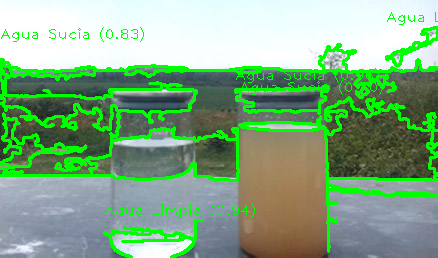

In [ ]:
# Paso 1: Instalación de dependencias
!pip install tensorflow==2.8 tensorflowjs opencv-python numpy pandas matplotlib scikit-learn tensorflow-decision-forests

# Importar librerías necesarias
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Función para preprocesar imágenes
def preprocess_image(image_path, target_size=(64, 64)):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Advertencia: No se pudo leer la imagen en la ruta: {image_path}")
            return None
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, target_size)
        return image / 255.0  # Normalizar entre 0 y 1
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {e}")
        return None

# Función para crear un modelo CNN avanzado
def create_advanced_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Función para predecir categorías (agua limpia vs agua sucia)
def predict_category(roi, model):
    try:
        roi_resized = cv2.resize(roi, (64, 64)) / 255.0
        roi_expanded = np.expand_dims(roi_resized, axis=0)
        prediction = model.predict(roi_expanded)
        return np.argmax(prediction), np.max(prediction)
    except Exception as e:
        print(f"Error al predecir: {e}")
        return None, None

# Cargar imágenes y etiquetas
image_paths = [
    '/content/agua_limpia_1.jpg', '/content/agua_limpia_2.jpg', '/content/agua_limpia_3.jpg',
    '/content/agua_limpia_4.jpg', '/content/agua_limpia_5.jpg', '/content/agua_limpia_6.jpg',
    '/content/agua_sucia_1.jpg', '/content/agua_sucia_2.jpg', '/content/agua_sucia_3.jpg',
    '/content/agua_sucia_4.jpg', '/content/agua_sucia_5.jpg', '/content/agua_sucia_6.jpg'
]
labels = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

X, y = [], []
for path, label in zip(image_paths, labels):
    processed_image = preprocess_image(path)
    if processed_image is not None:
        X.append(processed_image)
        y.append(label)

if len(X) == 0:
    raise ValueError("Error: No se cargaron imágenes válidas. Verifica las rutas o el formato de las imágenes.")

X = np.array(X)
y = to_categorical(y, num_classes=2)

# Dividir datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = create_advanced_model((64, 64, 3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=8)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Pérdida en validación: {loss:.4f}")
print(f"Precisión en validación: {accuracy:.4f}")

# Mostrar métricas de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Guardar el modelo
model.save('/content/water_quality_model.h5')

# Detectar agua limpia o sucia en una imagen de prueba
test_image_path = '/content/image_test.jpg'
image = cv2.imread(test_image_path)
if image is None:
    print("Error: La imagen de prueba no se pudo cargar.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 50, 150)
    canny = cv2.dilate(canny, None, iterations=1)
    canny = cv2.erode(canny, None, iterations=1)
    cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)

        # Filtrar regiones pequeñas
        if w * h < 1000:
            continue

        roi = image[y:y+h, x:x+w]
        if roi.size > 0:
            class_idx, confidence = predict_category(roi, model)
            if confidence is not None and confidence > 0.7:
                label = ["Agua Limpia", "Agua Sucia"][class_idx]
                cv2.putText(image, f"{label} ({confidence:.2f})", (x, y-5), 1, 1, (0, 255, 0), 1)
            cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

    cv2_imshow(image)


In [ ]:
# Instalamos la biblioteca necesaria
!pip install --upgrade --force-reinstall ipywidgets

from google.colab import output
output.enable_custom_widget_manager()


# Importamos las bibliotecas necesarias
from IPython.display import display
import ipywidgets as widgets
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Definimos una función para capturar imágenes desde la cámara
def take_photo(filename='photo.jpg', quality=0.8):
    js = """
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Tomar Foto';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        div.appendChild(video);
        document.body.appendChild(div);

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        // Espera a que el usuario presione el botón
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
    }
    takePhoto({quality});
    """
    display(widgets.HTML("<h2>Activa tu cámara y haz clic en 'Tomar Foto'</h2>"))
    data = eval_js(js)
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Función para predecir la calidad del agua
def predict_category(roi, model):
    roi_resized = cv2.resize(roi, (64, 64)) / 255.0
    roi_expanded = np.expand_dims(roi_resized, axis=0)
    prediction = model.predict(roi_expanded)
    return np.argmax(prediction), np.max(prediction)

# Cargamos el modelo previamente entrenado
model = tf.keras.models.load_model('/content/water_quality_model.h5')

# Capturamos la imagen desde la cámara
photo_path = take_photo()

# Procesamos la imagen capturada
image = cv2.imread(photo_path)
if image is None:
    print("Error: No se pudo cargar la imagen.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 50, 150)
    canny = cv2.dilate(canny, None, iterations=1)
    canny = cv2.erode(canny, None, iterations=1)
    cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)

        # Filtrar regiones pequeñas
        if w * h < 1000:
            continue

        roi = image[y:y+h, x:x+w]
        if roi.size > 0:
            class_idx, confidence = predict_category(roi, model)
            if confidence is not None and confidence > 0.7:
                label = ["Agua Limpia", "Agua Sucia"][class_idx]
                cv2.putText(image, f"{label} ({confidence:.2f})", (x, y-5), 1, 1, (0, 255, 0), 1)
            cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

    # Mostramos el resultado
    cv2_imshow(image)


  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 820.8/820.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.9 MB/s eta 0:00:00
Using cached jedi-0.19.2-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.13
    Uninstalling wcwidth-0.2.13:
      Successfully uninstalled wcwidth-0.2.13
  Attemp

HTML(value="<h2>Activa tu cámara y haz clic en 'Tomar Foto'</h2>")

MessageError: ReferenceError: quality is not defined

In [ ]:
!mkdir tfjs_water_quality_model
!pip install tensorflowjs
# Convertir el modelo a TensorFlow.js
!tensorflowjs_converter --input_format keras --output_format tfjs_layers_model /content/water_quality_model.h5 /content/tfjs_water_quality_model


mkdir: cannot create directory ‘tfjs_water_quality_model’: File exists
  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached tensorflow_decision_forests-1.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Fou

2024-12-09 21:45:48.837452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733780748.884656    4209 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733780748.897703    4209 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
